In [1]:
using Distributions
using Random
using Plots
Random.seed!(2)

TaskLocalRNG()

## 1. Discrete Inverse Transform sampler for Poisson distribution

In [2]:
function samplePoisson(U, λ, iters = 1000)
    p = ℯ^-λ
    A = p
    for i in 0:iters
        if U < A
            return i
        else
            p = λ*p/(i+1)
            A = A + p
        end
    end
end

samplePoisson (generic function with 2 methods)

In [3]:
function drawPoisson(λ)
    x = rand(Uniform(0, 1))
    return samplePoisson(x, λ)
end

drawPoisson (generic function with 1 method)

### Iteration loop

In [4]:
λ = 10 # Poisson Distribution 
y = []
samples = 1000
for i in 1:samples
    push!(y, drawPoisson(λ)) 
end

### Results

In [5]:
μ_s = sum(y)/samples
σ_s = sum((y .- μ_s) .^ 2) / (samples - 1)
println("Mean: ", μ_s)
println("Variance: ", σ_s)

Mean: 10.08
Variance: 10.195795795795796


Mean and variance of the poisson distribution = $\lambda$

In [6]:
μ_diff = μ_s - λ
σ_diff = σ_s - λ
println("Deviation in mean: ", μ_diff)
println("Deviation in variance: ", σ_diff)

Deviation in mean: 0.08000000000000007
Deviation in variance: 0.19579579579579587


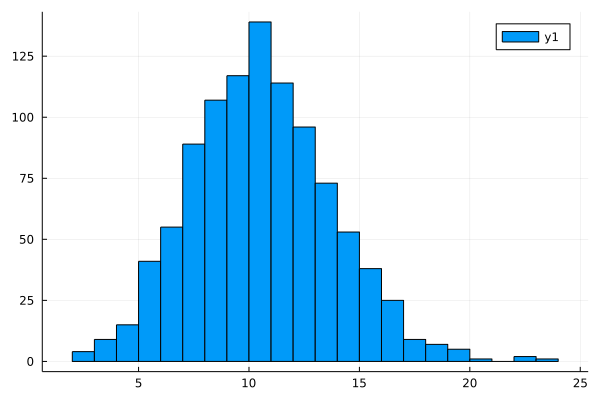

In [7]:
plot(histogram(y))

We can observe that the maxima is around our expected mean $\mu$ and the distribution is contained within $\mu - \sigma^2$ and $\mu + \sigma^2$ where $\sigma^2$ is the variance.

---

## 2. Discrete Accept Reject Sampler to simulate draws from Binomial(n, p) using a Poisson proposal

In [8]:
function drawBinomial(n, p, λ = 5)
    get_ratio = x -> (binomial(n, x) * p^x * (1 - p)^(n - x)) * factorial(big(x)) / (ℯ^(-λ) * λ^x)
    c_arr = []
    for i in 0:n
        push!(c_arr, get_ratio(i))
    end
    c = maximum(c_arr)
    
    accept = false
    while .!accept
        U = rand(Uniform(0, 1))
        prop = drawPoisson(λ)
        if U < get_ratio(prop)/c
            accept = 1
            return prop
        end
    end
end

drawBinomial (generic function with 2 methods)

In [9]:
# y contains samples drawn from the binomial distribution with n = 10 and p = 0.25
n = 10
p = 0.25
y_b = []
samples = 1000
for i in 1:samples
    push!(y_b, drawBinomial(10, 0.25))
end

In [10]:
μ_b = sum(y_b)/samples
σ_b = sum((y_b .- μ_b) .^ 2) / (samples - 1)
println("Mean: ", μ_b)
println("Variance: ", σ_b)

Mean: 2.427
Variance: 1.9646356356356338


Mean of the binomial distribution = np

Variance of the binomial distribution = np(1-p)

In [11]:
μ_b_diff = μ_b - n*p
σ_b_diff = σ_b - n*p*(1-p)
println("Deviation in mean: ", μ_b_diff)
println("Deviation in variance: ", σ_b_diff)

Deviation in mean: -0.07299999999999995
Deviation in variance: 0.08963563563563381


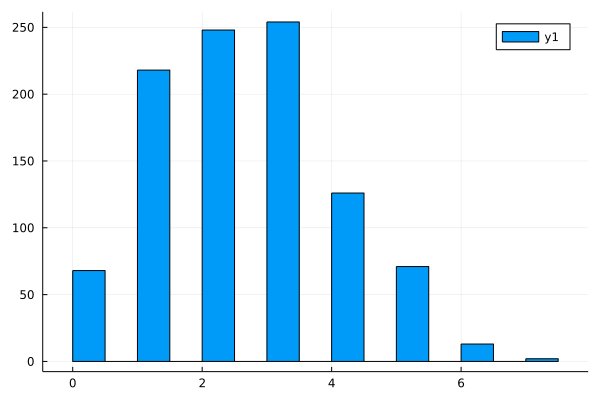

In [12]:
plot(histogram(y_b))

We can observe that the maxima is around our expected mean $\mu$.